In [1]:
import pandas as pd
import numpy as np
print(pd.__version__)

1.0.5


In [2]:
positive_footprint = pd.read_table("new_footprint_positivecuts.bed", names="chr start end motif_cluster score strand thickstart thickend itemRgb best_model match_score DBD num_models seqname start2 end2 identifier2 mean_signal numsamples summit core_start core_end component score1 score3 log_cuts_per_base basepairoverlap".split(), header=None)
positive_footprint = positive_footprint.drop_duplicates(subset="chr start end".split())
positive_footprint.head(10)

,chr,start,end,motif_cluster,score,strand,thickstart,thickend,itemRgb,best_model,...,mean_signal,numsamples,summit,core_start,core_end,component,score1,score3,log_cuts_per_base,basepairoverlap
0,chr12,388875,388885,NFKB/1,0,-,388875,388885,"41,255,205",NFKB2_HUMAN.H11MO.0.B,...,0.852214,172,388970,388890.0,389030.0,Lymphoid,725,3.419811,1.943454,10
1,chr12,388876,388896,GC-tract,0,-,388876,388896,"0,28,255",MAZ_HUMAN.H11MO.0.A,...,0.852214,172,388970,388890.0,389030.0,Lymphoid,725,3.419811,1.943454,20
2,chr12,388876,388893,KLF/SP/2,0,-,388876,388893,"0,28,255",SP5_MOUSE.H11MO.0.C,...,0.852214,172,388970,388890.0,389030.0,Lymphoid,725,3.419811,1.943454,17
3,chr12,388877,388889,SPI,0,-,388877,388889,"5,236,241",Spic.mouse_ETS_1,...,0.852214,172,388970,388890.0,389030.0,Lymphoid,725,3.419811,1.943454,12
4,chr12,388878,388895,KLF/SP/2,0,-,388878,388895,"0,28,255",SP5_MOUSE.H11MO.0.C,...,0.852214,172,388970,388890.0,389030.0,Lymphoid,725,3.419811,1.943454,17
5,chr12,388878,388886,ZIC/2,0,-,388878,388886,"0,28,255",Zfp740.mouse_C2H2_1,...,0.852214,172,388970,388890.0,389030.0,Lymphoid,725,3.419811,1.943454,8
6,chr12,388879,388899,GC-tract,0,-,388879,388899,"0,28,255",ZNF263_MA0528.1,...,0.852214,172,388970,388890.0,389030.0,Lymphoid,725,3.419811,1.943454,20
7,chr12,388879,388896,KLF/SP/2,0,-,388879,388896,"0,28,255",SP5_MOUSE.H11MO.0.C,...,0.852214,172,388970,388890.0,389030.0,Lymphoid,725,3.419811,1.943454,17
8,chr12,388879,388892,SOX/1,0,+,388879,388892,"0,0,227",SOX2_HUMAN.H11MO.0.A,...,0.852214,172,388970,388890.0,389030.0,Lymphoid,725,3.419811,1.943454,13
9,chr12,388879,388887,ZIC/2,0,-,388879,388887,"0,28,255",ZNF740_C2H2_1,...,0.852214,172,388970,388890.0,389030.0,Lymphoid,725,3.419811,1.943454,8


In [3]:
negative_footprint = pd.read_table("new_footprint_negativecuts.bed", names="chr start end motif_cluster score strand thickstart thickend itemRgb best_model match_score DBD num_models seqname start2 end2 identifier2 mean_signal numsamples summit core_start core_end component score1 score3 log_cuts_per_base basepairoverlap".split(), header=None)
negative_footprint = negative_footprint.drop_duplicates(subset="chr start end".split())
negative_footprint.head(5)

,chr,start,end,motif_cluster,score,strand,thickstart,thickend,itemRgb,best_model,...,mean_signal,numsamples,summit,core_start,core_end,component,score1,score3,log_cuts_per_base,basepairoverlap
0,chr12,10598,10618,GC-tract,0,-,10598,10618,"0,28,255",THAP1_HUMAN.H11MO.0.C,...,0.544882,18,10670,10578.0,10690.0,Placental / trophoblast,1,0.012658,0.012658,1
1,chr12,10601,10621,GC-tract,0,-,10601,10621,"0,28,255",THAP1_HUMAN.H11MO.0.C,...,0.544882,18,10670,10578.0,10690.0,Placental / trophoblast,1,0.012658,0.012658,4
2,chr12,10601,10618,PAX/2,0,-,10601,10618,"127,0,0",PAX5_MOUSE.H11MO.0.A,...,0.544882,18,10670,10578.0,10690.0,Placental / trophoblast,1,0.012658,0.012658,1
3,chr12,10602,10619,PAX/2,0,+,10602,10619,"127,0,0",PAX5_HUMAN.H11MO.0.A,...,0.544882,18,10670,10578.0,10690.0,Placental / trophoblast,1,0.012658,0.012658,2
4,chr12,10603,10620,KLF/SP/2,0,-,10603,10620,"0,28,255",SP2_HUMAN.H11MO.0.A,...,0.544882,18,10670,10578.0,10690.0,Placental / trophoblast,1,0.012658,0.012658,3


In [4]:
positive_footprint_dropduplicates = positive_footprint.drop_duplicates("seqname start2 end2 motif_cluster".split())
positive_footprint_dropduplicates[['seqname', 'start2', 'end2', 'motif_cluster']]
pos_enrich = positive_footprint_dropduplicates.groupby('motif_cluster').size()
df_pos_enrich = pd.DataFrame(pos_enrich)
df_pos_enrich.columns = ['pos_frequency']

In [5]:
positive_footprint_dropduplicates = positive_footprint.drop_duplicates("seqname start2 end2 motif_cluster".split())
positive_footprint_dropduplicates[['seqname', 'start2', 'end2', 'motif_cluster', 'log_cuts_per_base']]
len(positive_footprint_dropduplicates)

66234

In [6]:
negative_footprint_dropduplicates = negative_footprint.drop_duplicates(subset="chr start end".split())
negative_footprint_dropduplicates[['seqname', 'start2', 'end2', 'motif_cluster']]
neg_enrich = negative_footprint_dropduplicates.groupby('motif_cluster').size()
neg_enrich = pd.DataFrame(neg_enrich)
neg_enrich.columns = ['neg_frequency']
neg_enrich.neg_frequency.astype(str).str.split(',', expand=True)
len(negative_footprint_dropduplicates)

755064

In [7]:
intersection = pd.merge(df_pos_enrich, neg_enrich, how='inner', on='motif_cluster')

In [8]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
intersection['pos_enrich'] = intersection.pos_frequency/(intersection.pos_frequency + intersection.neg_frequency)
df_intersection_pos = pd.DataFrame(intersection['pos_enrich'])

In [9]:
merge = pd.concat([positive_footprint_dropduplicates, negative_footprint_dropduplicates])
footprints = pd.DataFrame(merge)
footprints.head(5)
footprints.to_csv('footprints_pos_neg.bed', header=None, sep="\t", index=None)

In [10]:
footprints = pd.read_table('footprints_pos_neg.bed', names="chr start end motif_cluster score strand thickstart thickend itemRgb best_model match_score DBD num_models seqname start2 end2 identifier2 mean_signal numsamples summit core_start core_end component score1 score3 log_cuts_per_base basepairoverlap".split(), header=None)
len(footprints)

821298

In [11]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

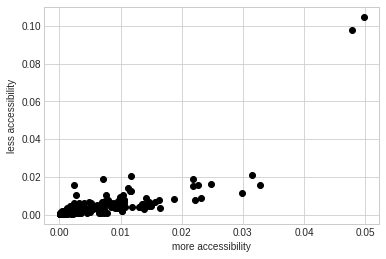

In [12]:
x = intersection.pos_frequency/51944
y = intersection.neg_frequency/756433

plt.plot(x, y, 'o', color='black', );

plt.xlabel('more accessibility')
plt.ylabel('less accessibility');

In [ ]:
motif_moreaccess = intersection.pos_frequency/(intersection.pos_frequency + intersection.neg_frequency)
motif_lessaccess = intersection.neg_frequency/(intersection.pos_frequency + intersection.neg_frequency)
not_motif_moreaccess = (51944 - intersection.pos_frequency)/(808377-(intersection.pos_frequency + intersection.neg_frequency))
not_motif_lessaccess = (756433 - intersection.neg_frequency)/(808377-(intersection.pos_frequency + intersection.neg_frequency))
odds_ratio = ((motif_moreaccess)/(motif_lessaccess))/((not_motif_moreaccess)/(not_motif_lessaccess))
log_odds_ratio = np.log(odds_ratio)

In [ ]:
import pylab
pylab.hist(positive_footprint_dropduplicates.drop_duplicates("seqname start2 end2".split()).log_cuts_per_base, 30)
has_motif_STAT1 = positive_footprint_dropduplicates.groupby("seqname start2 end2".split()).apply(lambda grp: ('STAT/1' in grp.motif_cluster))

In [ ]:
#Enrichment Table
more_access_has_motif = df_pos_enrich
more_access_has_motif.columns = ['more_access_motif']
less_access_has_motif = neg_enrich
less_access_has_motif.columns = ['less_access_motif']
more_access_no_motif = 5144 - df_pos_enrich
more_access_no_motif.columns = ['more_access_no_motif']
less_access_no_motif = 756433 - neg_enrich
less_access_no_motif.columns = ['less_access_no_motif']
has_motif = pd.merge(df_pos_enrich, neg_enrich, how='inner', on='motif_cluster')
no_motif = pd.merge(more_access_no_motif, less_access_no_motif, how='inner', on='motif_cluster')
enrich = pd.merge(has_motif, no_motif, how='inner', on='motif_cluster')
enrich

In [ ]:
import pylab
pylab.hist(positive_footprint_dropduplicates.drop_duplicates("seqname start2 end2".split()).log_cuts_per_base, 30)
type(positive_footprint_dropduplicates.motif_cluster.values[0])

In [ ]:
has_motif_log_cuts_per_base = {}
hasnt_motif_log_cuts_per_base = {}
grouping = negative_footprint.groupby("chr start2 end2".split())
log_cuts_per_group = grouping.log_cuts_per_base.first()
for motif in negative_footprint.motif_cluster.unique():
    has_motif_mask = grouping.apply(lambda g: motif in g.motif_cluster.values)
    has_motif_log_cuts_per_base[motif] = log_cuts_per_group[has_motif_mask]
    hasnt_motif_log_cuts_per_base[motif] = log_cuts_per_group[~ has_motif_mask]

In [ ]:
has_motif_log_cuts_per_base = {}
hasnt_motif_log_cuts_per_base = {}
grouping = positive_footprint.groupby("chr start2 end2".split())
log_cuts_per_group = grouping.log_cuts_per_base.first()
for motif in positive_footprint.motif_cluster.unique():
    has_motif_mask = grouping.apply(lambda g: motif in g.motif_cluster.values)
    has_motif_log_cuts_per_base[motif] = log_cuts_per_group[has_motif_mask]
    hasnt_motif_log_cuts_per_base[motif] = log_cuts_per_group[~ has_motif_mask]

In [ ]:
import pylab
pylab.hist([has_motif_log_cuts_per_base['STAT/1'], hasnt_motif_log_cuts_per_base['STAT/1']], bins = 30, density=True)

In [ ]:
has_motif_log_cuts_per_base[motif]